In [1]:
# Do relevant imports

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [12]:
# Read in and grayscale the image

image = mpimg.imread('C:/Users/Lenovo/Desktop/Nanodegree/solidYellowLeft.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

In [13]:
# Define a kernel size and apply Gaussian smoothing

kernel_size = 3
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

In [14]:
# Define our parameters for Canny and apply

low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

In [15]:
# Next we'll create a masked edges image using cv2.fillPoly()

mask = np.zeros_like(edges)   
ignore_mask_color = 255

In [40]:
# This time we are defining a four sided polygon to mask

imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 320), (500, 300), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

In [46]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
threshold = 50
theta = np.pi/180
min_line_length = 30
max_line_gap = 70
line_image = np.copy(image)*0 #creating a blank to draw lines on

In [47]:
# Run Hough on edge detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

In [48]:
# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

In [49]:
# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges))

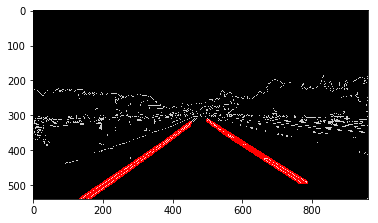

In [50]:
# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)